#### Import Data and Required Packages 


Importing Pandas, Numpy,Matplotlib, Seaborn and Warnings library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')


#### Import CSv Data as Pandas DataFrame

In [5]:
df=pd.read_csv("data/StdsPerform.csv")

#### Show Top 5 Records

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

#### Checking Missing Values

In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Exploring Data

In [16]:
print("Categories in 'gender' variable : ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' : ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' : ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable : ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable : ",end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable :  ['female' 'male']
Categories in 'race/ethnicity' :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test preparation course' variable :  ['none' 'completed']


In [17]:
#defining numerical and categorical columns
numeric_features= [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype =='O']

#print columns 
print("Number of Numerical features {} which are : {} ".format(len(numeric_features),numeric_features))
print("Number of Categorical features {} which are : {} ".format(len(categorical_features),categorical_features))

Number of Numerical features 3 which are : ['math score', 'reading score', 'writing score'] 
Number of Categorical features 5 which are : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


#### Adding columns for 'Total Score' and 'Average' 

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
df.to_csv("data/cleaned.csv")

In [19]:
reading_full=df[df['reading score']== 100]['average'].count()
wrting_full=df[df['writing score']== 100]['average'].count()
math_full=df[df['math score']== 100]['average'].count()

print("Number of students who scored full marks in reading : ",reading_full)
print("Number of students who scored full marks in writing : ",wrting_full)
print("Number of students who scored full marks in math : ",math_full)

Number of students who scored full marks in reading :  17
Number of students who scored full marks in writing :  14
Number of students who scored full marks in math :  7


In [ ]:
reading_less_than_20=df[df['reading score'] <=20]['average'].count()
writing_less_than_20=df[df['writing score'] <=20]['average'].count()
math_less_than_20=df[df['math score'] <=20]['average'].count()

print("Number of students who scored less than 20 in reading : ",reading_less_than_20)
print("Number of students who scored less than 20 in writing : ",writing_less_than_20)
print("Number of students who scored less than 20 in math : ",math_less_than_20)  

#### Exploring Data 
* Histogram
* Kernel Distribution Function(KDE)


#### Histogram 

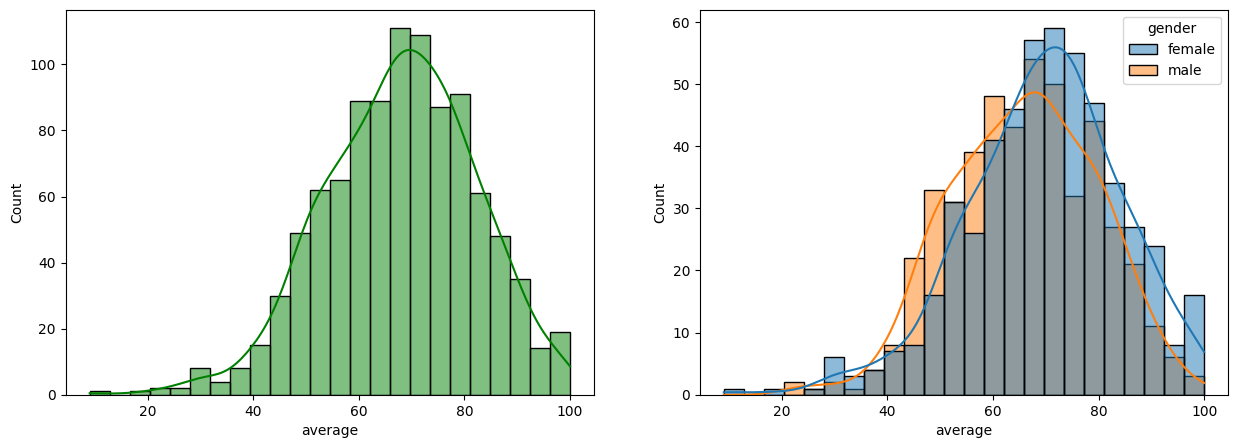

In [29]:
fig, axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.histplot(data=df,x="average",kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue='gender')
plt.show()

#### Insights
* Female students perform well than male students 

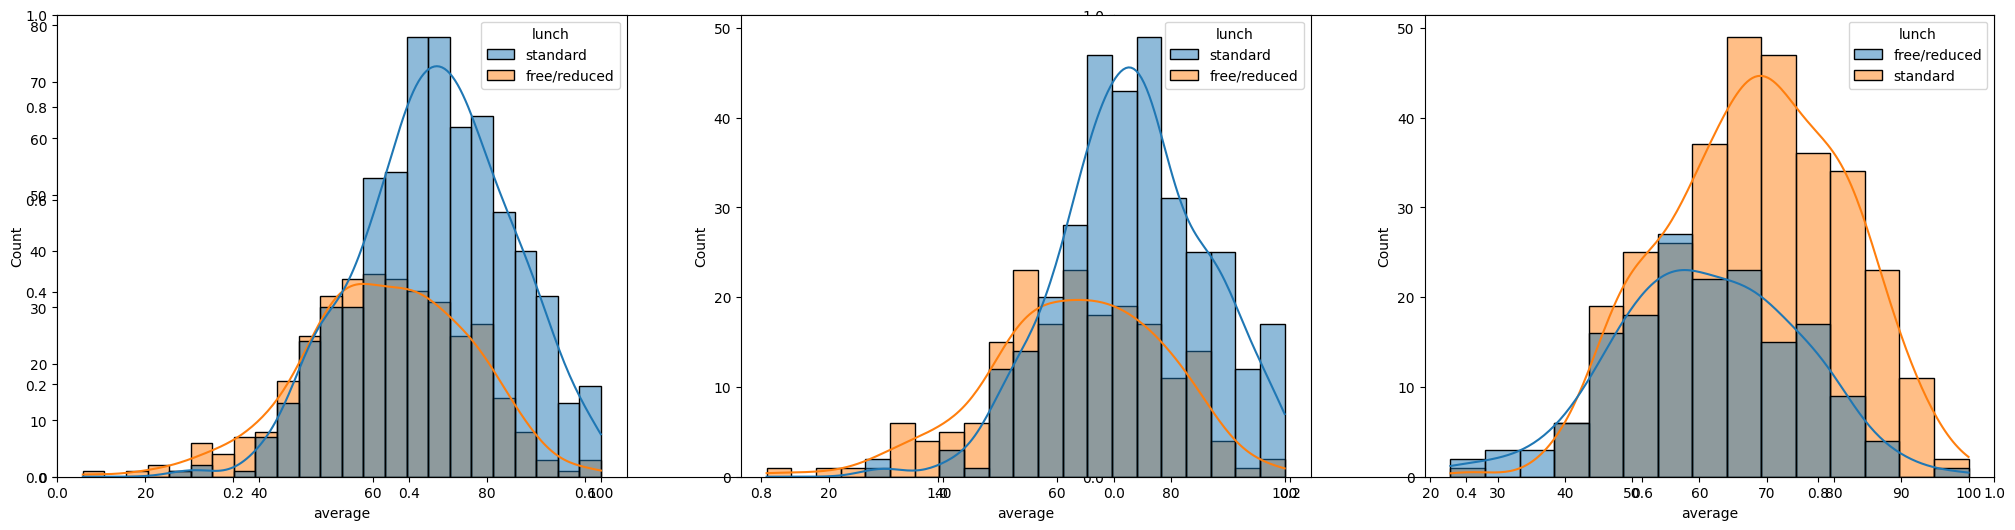

In [33]:
fig, axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#### Insights
* Standard lunch helps students perform well whether its male or female
 

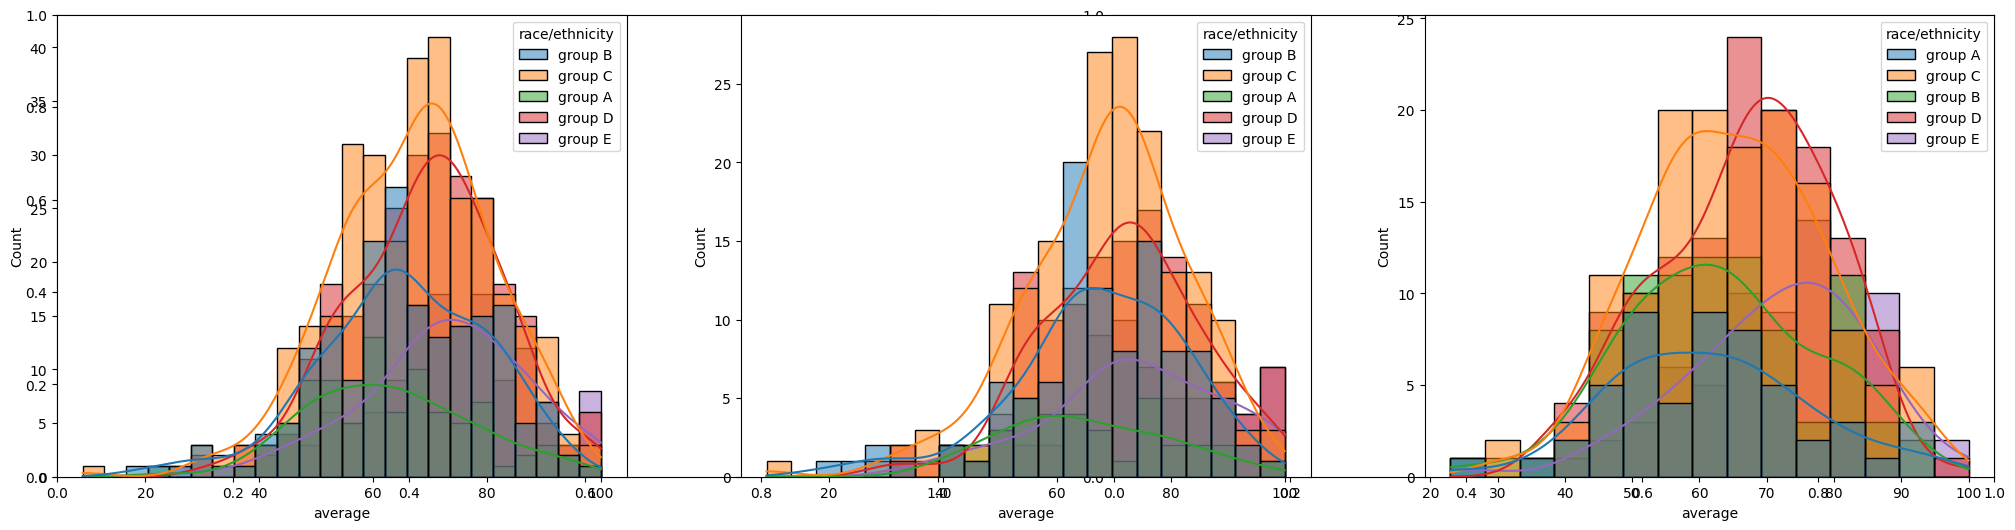

In [34]:
fig, axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#### Insights
* Overall Group C ethnicity students perform well in exams 
* Female students from Group C ethnicity perform well in exams
* Male students rom group D ethnicity perform well in exams
 

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


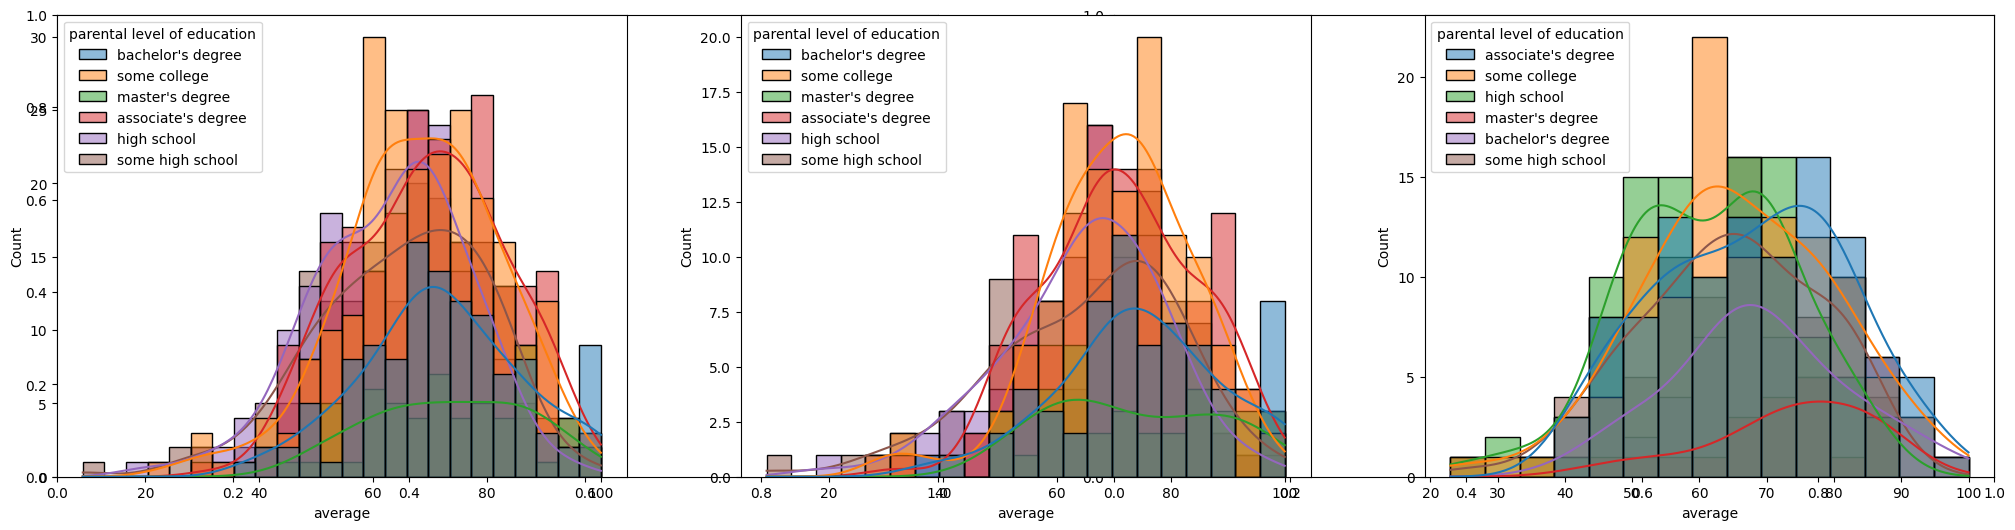

In [36]:
fig, axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

#### Insights
* Parental level of education doesn't effect students performance much 
* Parental level of education doesn't effect female students performance much 
* Male students of Parents with master's degree comparatively perform well

<Axes: title={'center': 'Writing Score'}, ylabel='writing score'>

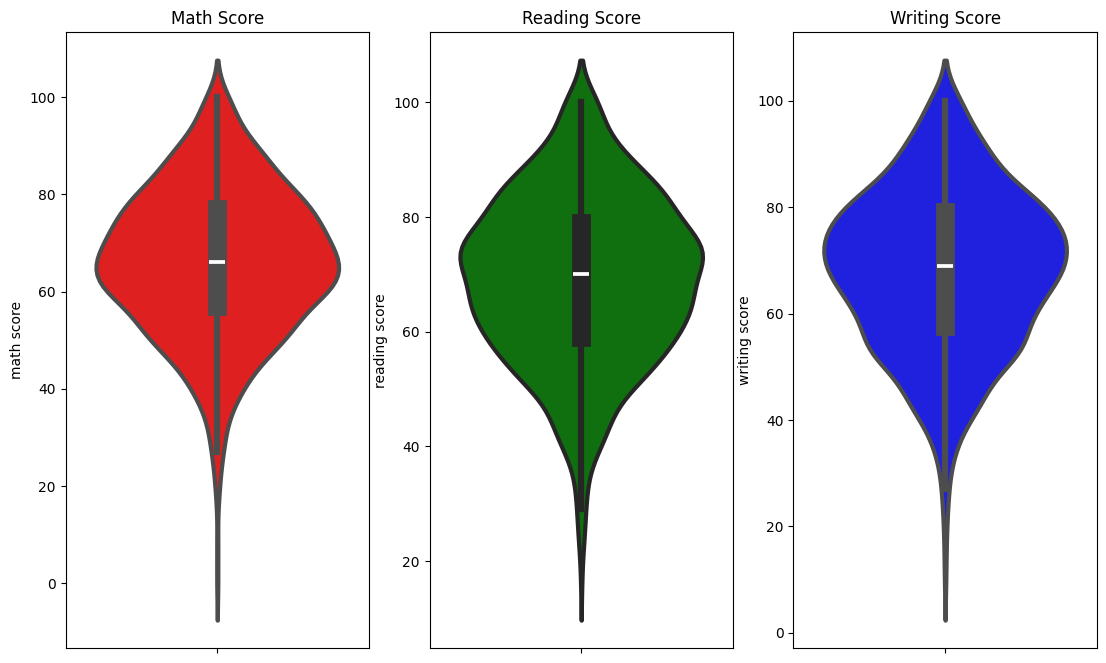

In [38]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)


#### Pie chart 

In [ ]:
# for feature in df.columns:
#     percentage=df[feature].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels= 'Female','Male'
color =['red','green']